# Matematički softver
## Prvi kolokvij
## Rješenja

### Prvi zadatak

Napišite funkciju `usporedi` koja prima dvije liste, u svakoj od kojih se nalaze samo cijeli brojevi (`int`) i stringovi (`str`). Ako nisu jednake duljine, `usporedi` vraća `False`. Ako jesu, `usporedi` treba ustanoviti jesu li elementi na odgovarajućim pozicijama "slični".

* dva cijela broja su slični ako je jedan od njih (bilo koji) djeljiv onim drugim
* dva stringa su slični ako su jednaki do na veličinu slova (_case insensitive_)
* string i cijeli broj nisu nikada slični

Primjerice, `usporedi([a, b, c], [d, e, f])` treba vratiti `True` ako su `a` i `d` slični, `b` i `e` slični, te `c` i `f` slični.

In [1]:
def slični(x, y):
    if type(x) is type(y) is int: return not (x and y and x % y and y % x)
    elif type(x) is type(y) is str: return x.casefold() == y.casefold()

In [2]:
def usporedi(prva, druga):
    return len(prva) == len(druga) and all(map(slični, prva, druga))

In [3]:
all([
    usporedi([24, 'v'], [12, 'V']) == True,
    usporedi([1, 2], [1]) == False,
    usporedi([1, 't'], ['t', 1]) == False,
    usporedi(['', 0, 'Wäßrig'], ['', 52, 'WÄSSRIG']) == True
])

True

### Drugi zadatak

U varijabli `kocke` nalazi se tri milijuna rezultata bacanja igraće kocke.

In [4]:
import numpy as np

In [5]:
kocke = 1 + np.random.randint(0, 6, 3_000_000, dtype=np.int8)

#### a)

Interpretirajte `kocke` kao niz pokusa bacanja po četiri kocke (ne kopirajte podatke, samo im promijenite oblik).

Izračunajte, i izrazite u postotcima na dvije decimale, _a posteriori_ vjerojatnost da se u bacanju četiri kocke pojavi bar jedna šestica. Isplati li se kladiti (1:1) na taj događaj? 

In [6]:
def vjerojatnost(događaj):
    vj = događaj.any(axis=1).mean()
    print(format(vj, '.2%'))
    return vj > .5

In [7]:
pokus1 = kocke.reshape(-1, 4)
vjerojatnost(pokus1 == 6)

51.83%


True

#### b)

Sada reinterpretirajte `kocke` kao niz pokusa, svaki od kojih se sastoji od 24 bacanja 2 kocke (trodimenzionalni tenzor).

Odgovorite na ista pitanja kao u **a)**, za događaj da se u 24 bacanja 2 kocke bar jednom pojavi dvostruka šestica.

In [8]:
pokus2 = kocke.reshape(-1, 24, 2)
vjerojatnost(pokus2.min(axis=2) == 6)

49.13%


False

### Treći zadatak

U datoteci `bodovi.csv` nalaze se bodovi studenata nekog izmišljenog kolegija. Stupci su redom ime i prezime studenta, bodovi s prvog i drugog kolokvija, te bodovi s tri zadaće.

* Učitajte datoteku u DataFrame.
* Dodajte stupac `Kolokviji` koji predstavlja zbroj bodova na oba kolokvija.
* Dodajte stupac `Zadaće` koji predstavlja ukupan broj bodova na zadaćama. Najslabije napisana zadaća se ne računa.
* Odredite je li bolje (u prosjeku) bio napisan prvi ili drugi kolokvij.
* Ispišite _top 10_ studenata po ukupnim bodovima (kolokviji plus zadaće).

Sve radite u jednom DataFrameu. Smijete dodavati i pomoćne stupce (osim dva gore zadana), ali ih morate obrisati kasnije.

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('bodovi.csv', delimiter='\t', names='ime prezime k1 k2 z1 z2 z3'.split())

In [11]:
df['Kolokviji'] = df['k1'] + df['k2']

In [12]:
zadaće = df[['z1', 'z2', 'z3']]
df['Zadaće'] = zadaće.sum(axis=1) - zadaće.min(axis=1)

In [13]:
df[['k1', 'k2']].mean().idxmax()

'k2'

In [14]:
df['Ukupno'] = df['Kolokviji'] + df['Zadaće']
df.sort_values('Ukupno', ascending=False).head(10)[['ime', 'prezime']]

,ime,prezime
410,Eliza,Mora
599,Mercedes,Boone
170,Leslie,Glass
50,Lea,Henry
250,Madilyn,Martinez
380,Brittany,Kaufman
204,Makaila,Schaefer
603,Joy,Dorsey
892,Braylon,Sherman
909,Hillary,Gentry


In [15]:
del df['Ukupno']

### Četvrti zadatak

Nacrtajte, jedan pored drugog sa zajedničkom osi ordinata, grafove funkcijâ $f(x)=1/x$ i $g(x)=1/x^2$ na segmentu $[-1,1]$.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

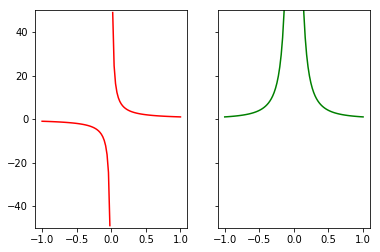

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
xneg = np.linspace(-1, 0)[:-1]
xpoz = np.linspace(0, 1)[1:]
ax2.set_ylim(-50, 50)
ax1.plot(xpoz, 1/xpoz, 'r')
ax1.plot(xneg, 1/xneg, 'r')
ax2.plot(xpoz, 1/xpoz**2, 'g')
ax2.plot(xneg, 1/xneg**2, 'g')

### Peti zadatak

Riješite egzaktno diferencijalnu jednadžbu $xy'+y=x\sin x$ uz početni uvjet $y\left(\frac\pi2\right)=-\frac12$.

In [18]:
import sympy as sp
sp.init_printing()

In [19]:
x, y = sp.Symbol('x'), sp.Function('y')
jedn = sp.Eq(x * sp.Derivative(y(x), x) + y(x), x * sp.sin(x))

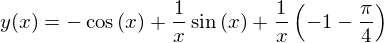

In [20]:
opće = sp.dsolve(jedn)
konstanta, = sp.solve(opće.subs({x: sp.pi / 2, y(x): -sp.S(1)/2}), dict=True)
opće.subs(konstanta)